# Шаг 1. Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Шаг 2. Импорт данных

Все три файла содержат числовые данные, сгенерированные по разным распределениям.  
Загружаем их в цикле, обрабатываем возможные ошибки (отсутствие файла, некорректный формат).


In [2]:
def load_single_line_csv(filename: str) -> pd.DataFrame:
    try:
        with open(filename, "r", encoding="utf-8") as f:
            line = f.readline().strip()
    except FileNotFoundError:
        print(f"Файл '{filename}' не найден.")
        return pd.DataFrame()

    try:
        values = [float(x) for x in line.split(",")]
    except ValueError as e:
        print(f"Некорректный формат данных в '{filename}': {e}")
        return pd.DataFrame()

    return pd.DataFrame(values, columns=["Value"])

files = ["set_1.csv", "set_2.csv", "set_3.csv"]
dfs = {}

for file in files:
    df = load_single_line_csv(file)
    if df.empty:
        print(f"Предупреждение: '{file}' не был загружен или пуст.")
    else:
        dfs[file] = df
        print(f"Файл '{file}' загружен. Кол-во значений: {len(df)}")

Файл 'set_1.csv' загружен. Кол-во значений: 100000
Файл 'set_2.csv' загружен. Кол-во значений: 10000
Файл 'set_3.csv' загружен. Кол-во значений: 100000


# Шаг 3. Анализ данных: математическое ожидание и несмещенная дисперсия

**Задачи:**

1. Реализовать функцию для расчета математического ожидания (среднего) набора чисел без использования встроенных методов.
2. Реализовать функцию для расчета несмещенной дисперсии по формуле:

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x}\right)^2
$$

где $\bar{x}$ — среднее арифметическое, а $n$ — число наблюдений.

Затем также тестирование провести тестирование.


In [3]:
def calculate_mean(data):
    total = 0.0
    count = 0
    for x in data:
        total += x
        count += 1
    if count == 0:
        return 0
    return total / count

def calculate_unbiased_variance(data):
    count = 0
    for _ in data:
        count += 1
    if count < 2:
        return 0
    mean_val = calculate_mean(data)
    sum_sq = 0.0
    for x in data:
        sum_sq += (x - mean_val) ** 2
    return sum_sq / (count - 1)

if "set_1.csv" in dfs:
    sample_data = []
    for i, value in enumerate(dfs["set_1.csv"]["Value"]):
        if i >= 5:
            break
        sample_data.append(value)

    print("Тестовая выборка (5 наблюдений):", sample_data)
    print("Среднее:", calculate_mean(sample_data))
    print("Несмещённая дисперсия:", calculate_unbiased_variance(sample_data))
else:
    print("Датасет set_1.csv не загружен для тестирования.")


Тестовая выборка (5 наблюдений): [3.0, 1.0, 1.0, 9.0, 8.0]
Среднее: 4.4
Несмещённая дисперсия: 14.8


# Шаг 4. Построение доверительных интервалов

Доверительный интервал для математического ожидания

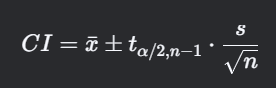

Доверительный интервал для дисперсии

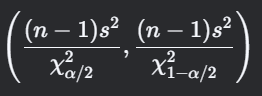


set_1.csv
Доверительный интервал для мат. ожидания: (3.055, 3.652)
Мат. ожидания: 3.353
Доверительный интервал для дисперсии: (5.953, 8.208)
Дисперсии: 6.945


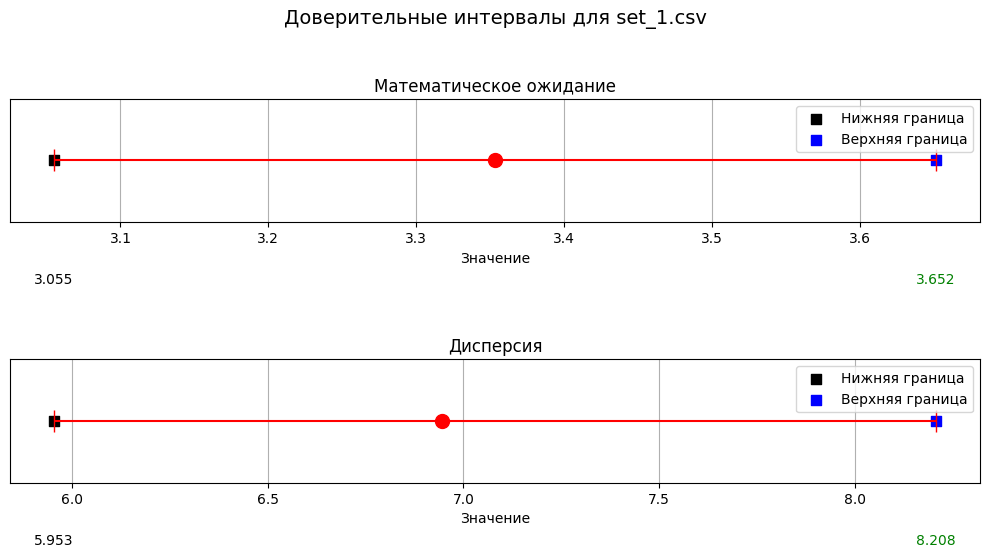


set_2.csv
Доверительный интервал для мат. ожидания: (4.771, 5.017)
Мат. ожидания: 4.894
Доверительный интервал для дисперсии: (3.614, 4.307)
Дисперсии: 3.937


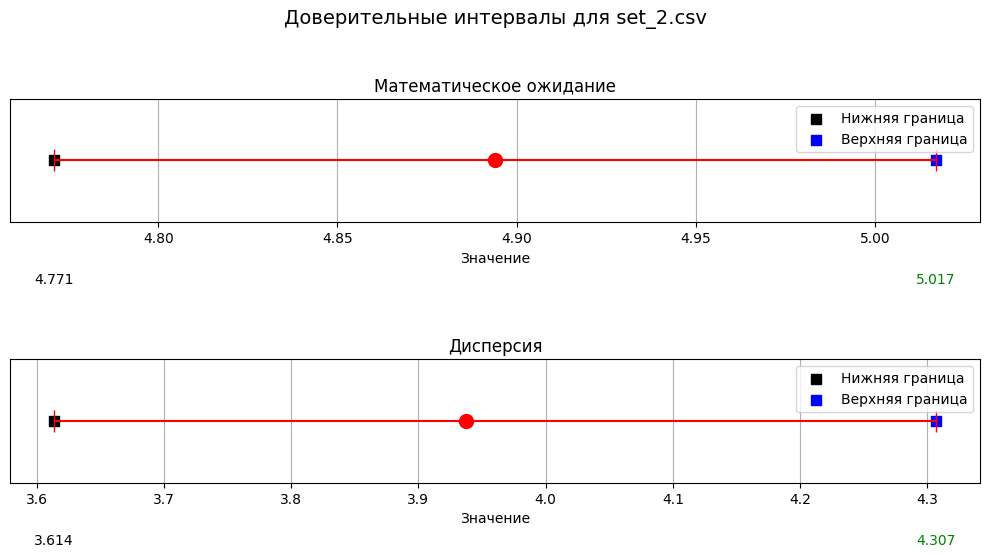


set_3.csv
Доверительный интервал для мат. ожидания: (1.888, 2.262)
Мат. ожидания: 2.075
Доверительный интервал для дисперсии: (4.041, 5.180)
Дисперсии: 4.557


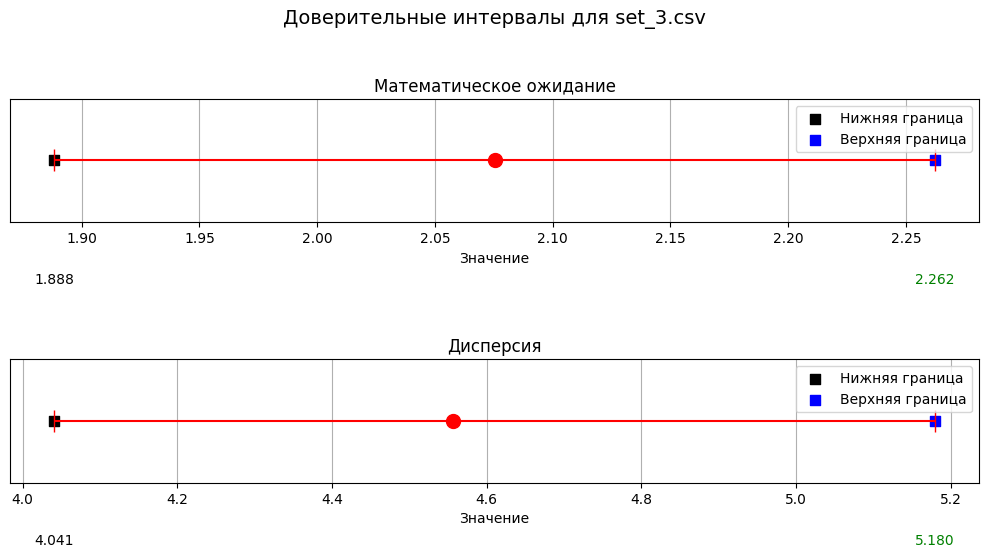

In [ ]:
def norminv(p):
    """
    Функция обратного нормального распределения (квантиль нормального распределения)
    Алгоритм Питера Аклэма
    """
    if p <= 0 or p >= 1:
        raise ValueError("Вероятность p должна быть в интервале (0,1)")
    # Коэффициенты для нижней области
    a = [ -39.69683028665376, 220.9460984245205, -275.9285104469687,
          138.3577518672690, -30.66479806614716, 2.506628277459239 ]
    b = [ -54.47609879822406, 161.5858368580409, -155.6989798598866,
          66.80131188771972, -13.28068155288572 ]
    # Коэффициенты для верхней области
    c = [ -0.007784894002430293, -0.3223964580411365, -2.400758277161838,
          -2.549732539343734, 4.374664141464968, 2.938163982698783 ]
    d = [ 0.007784695709041462, 0.3224671290700398, 2.445134137142996,
          3.754408661907416 ]

    plow = 0.02425
    phigh = 1 - plow

    if p < plow:
        q = math.sqrt(-2 * math.log(p))
        return (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
               ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
    elif p > phigh:
        q = math.sqrt(-2 * math.log(1 - p))
        return -(((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
    else:
        q = p - 0.5
        r = q * q
        return (((((a[0]*r + a[1])*r + a[2])*r + a[3])*r + a[4])*r + a[5])*q / \
               (((((b[0]*r + b[1])*r + b[2])*r + b[3])*r + b[4])*r + 1)
 
def student_t_quantile(p, df):
    """
    Приближённое вычисление квантиля распределения t (преобразование Корниша–Фишера)
    Для df == 1 (распределение Коши) используем точное выражение: tan(π(p - 0.5)).
    """
    if df == 1:
        return math.tan(math.pi * (p - 0.5))
    z = norminv(p)
    if df > 30:
        return z
    return z + (z**3 + z) / (4 * df) + (5 * z**5 + 16 * z**3 + 3 * z) / (96 * df**2)

def chi2_quantile(p, df):
    """
    Приближённое вычисление квантиля распределения χ² (преобразование Уилсона–Хилфeрти)
    Приближение квантиля распределения χ²
    """
    z = norminv(p)
    h = 1 - 2/(9*df)
    return df * (h + z*math.sqrt(2/(9*df)))**3

def integrate(f, a, b, n=1000):
    """
    (Метод Симпсона)
    """
    if n % 2:
        n += 1
    h = (b - a) / n
    s = f(a) + f(b)
    for i in range(1, n):
        x = a + i * h
        s += 4 * f(x) if i % 2 else 2 * f(x)
    return s * h / 3

def student_t_pdf(t, df):
    """
    Распределение Стьюдента
    """
    log_coef = math.lgamma((df + 1) / 2) - (0.5 * math.log(df * math.pi)) - math.lgamma(df / 2)
    coef = math.exp(log_coef)
    return coef * (1 + (t**2) / df) ** (-(df + 1) / 2)

def student_t_cdf(t, df):
    if t == 0:
        return 0.5
    if t > 0:
        return 0.5 + integrate(lambda x: student_t_pdf(x, df), 0, t)
    else:
        return 0.5 - integrate(lambda x: student_t_pdf(x, df), t, 0)

def chi2_pdf(x, df):
    """
    Распределение хи-квадрат (χ²)
    """
    if x < 0:
        return 0
    return (1 / (2 ** (df / 2) * math.gamma(df / 2))) * (x ** (df / 2 - 1)) * math.exp(-x / 2)

def chi2_cdf(x, df):
    if x <= 0:
        return 0
    return integrate(lambda t: chi2_pdf(t, df), 0, x)

def confidence_interval_mean(data, confidence=0.95):
    n = 0
    for _ in data:
        n += 1
    if n == 0:
        return (0, (0, 0))
    mean_val = calculate_mean(data)
    if n > 1:
        s2 = calculate_unbiased_variance(data)
        s = math.sqrt(s2)
    else:
        s = 0.0
    se = s / math.sqrt(n)
    alpha = 1 - confidence
    t_val = student_t_quantile(1 - alpha/2, n - 1) if n > 1 else 0
    lower = mean_val - t_val * se
    upper = mean_val + t_val * se
    return (mean_val, (lower, upper))

def confidence_interval_variance(data, confidence=0.95):
    n = 0
    for _ in data:
        n += 1
    if n < 2:
        return (0, (0, 0))
    s2 = calculate_unbiased_variance(data)
    df = n - 1 
    alpha = 1 - confidence
    chi2_lower = chi2_quantile(alpha/2, df)
    chi2_upper = chi2_quantile(1 - alpha/2, df)
    if chi2_lower <= 0 or chi2_upper <= 0:
        return (s2, (0, 0))
    lower = (df * s2) / chi2_upper
    upper = (df * s2) / chi2_lower
    return (s2, (lower, upper))

for file in files:
    if file in dfs:
        data = dfs[file]["Value"]
        mean_val, (mean_lower, mean_upper) = confidence_interval_mean(data, confidence=0.95)
        var_val, (var_lower, var_upper) = confidence_interval_variance(data, confidence=0.95)

        print(f"\n{file}")
        print(f"Доверительный интервал для мат. ожидания: ({mean_lower:.3f}, {mean_upper:.3f})")
        print(f"Мат. ожидания: {mean_val:.3f}")
        print(f"Доверительный интервал для дисперсии: ({var_lower:.3f}, {var_upper:.3f})")
        print(f"Дисперсии: {var_val:.3f}")

        fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=False)
        fig.suptitle(f"Доверительные интервалы для {file}", fontsize=14)

        axs[0].errorbar(x=mean_val, y=0, xerr=[[mean_val - mean_lower], [mean_upper - mean_val]], fmt='o', capsize=8, markersize=10, color='red')
        axs[0].scatter(mean_lower, 0, color='black', marker='s', s=50, label="Нижняя граница")
        axs[0].scatter(mean_upper, 0, color='blue', marker='s', s=50, label="Верхняя граница")
        axs[0].text(mean_lower, -0.1, f"{mean_lower:.3f}", ha="center", va="top", color="black", fontsize=10, )
        axs[0].text(mean_upper, -0.1, f"{mean_upper:.3f}", ha="center", va="top", color="green", fontsize=10,)
        axs[0].set_title("Математическое ожидание")
        axs[0].set_yticks([])
        axs[0].set_xlabel("Значение")
        axs[0].legend(loc='best')
        axs[0].grid(True, axis='x')

        axs[1].errorbar(x=var_val, y=0, xerr=[[var_val - var_lower], [var_upper - var_val]], fmt='o', capsize=8, markersize=10, color='red')
        axs[1].scatter(var_lower, 0, color='black', marker='s', s=50, label="Нижняя граница")
        axs[1].scatter(var_upper, 0, color='blue', marker='s', s=50, label="Верхняя граница")
        axs[1].text(var_lower, -0.1, f"{var_lower:.3f}", ha='center', va='top', color='black', fontsize=10)
        axs[1].text(var_upper, -0.1, f"{var_upper:.3f}", ha='center', va='top', color='green', fontsize=10)
        axs[1].set_title("Дисперсия")
        axs[1].set_yticks([])
        axs[1].set_xlabel("Значение")
        axs[1].legend(loc='best')
        axs[1].grid(True, axis='x')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print(f"{file}: Данные отсутствуют.")

## Шаг 5. Генерация теоретических распределений

1. Определим подходящее теоретическое распределение для каждого набора данных:
   - set_1.csv: геометрическое распределение.
   - set_2.csv: нормальное распределение.
   - set_3.csv: экспоненциальное распределение.

2. Реализуем функции генерации данных для стандартных распределений:

3. Строим графики гистограмм теоретических распределений и сравниваем их с гистограммами эмпирических данных.

> В результате вы увидите наложенные гистограммы: красным цветом — эмпирика, зелёным — сгенерированная теоретическая выборка.



=== Сравнение эмпирики и теории для set_1.csv ===
Эмпирическое среднее: 3.353
Эмпирическая дисперсия: 6.945
Оценка параметра p для геометрического распределения: 0.298


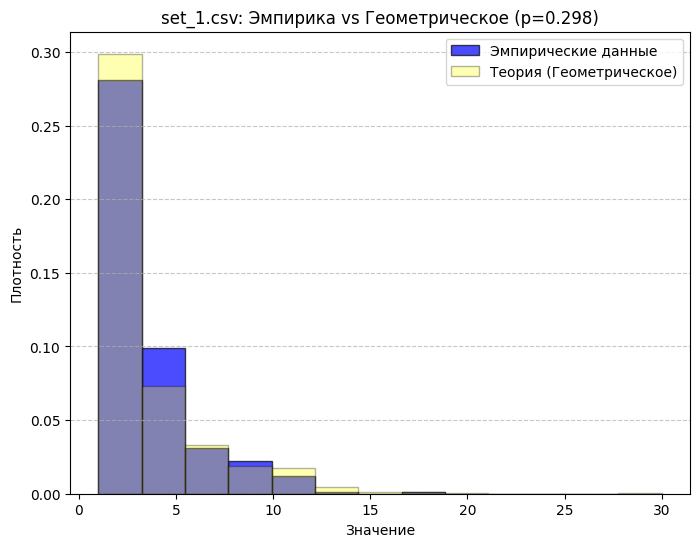


=== Сравнение эмпирики и теории для set_2.csv ===
Эмпирическое среднее: 4.894
Эмпирическая дисперсия: 3.937
Оценка mu = 4.894, sigma = 1.984


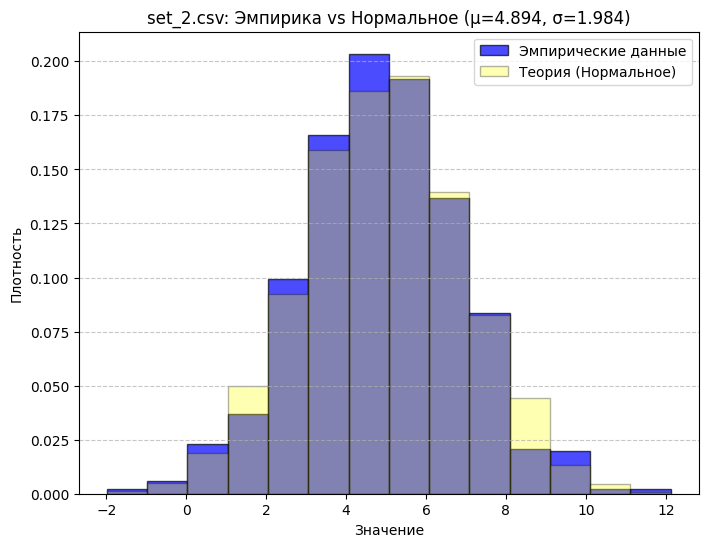


=== Сравнение эмпирики и теории для set_3.csv ===
Эмпирическое среднее: 2.075
Эмпирическая дисперсия: 4.557
Оценка λ = 0.482 (по положительным значениям)


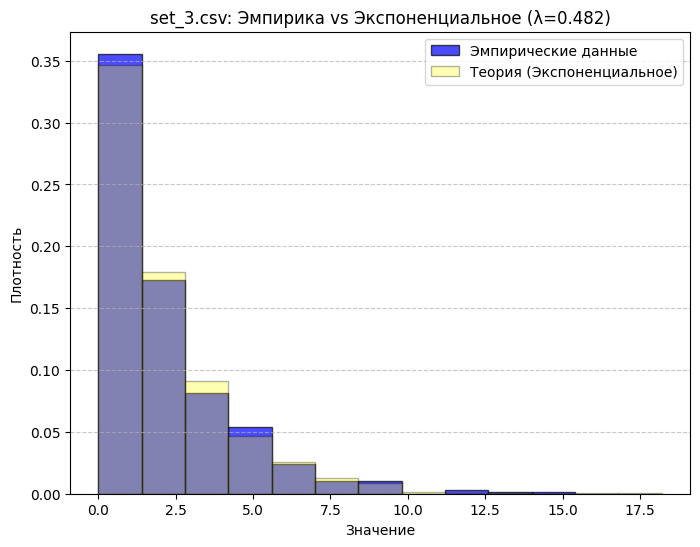

In [9]:
def calculate_bins_sturges(data):
    """
    Правило Стёрджеса: bins = ceil(1 + log2(n)).
    """
    n = len(data)
    if n <= 1:
        return 1
    return math.ceil(1 + math.log2(n))

def generate_geometric(p, size=1000):
    return np.random.geometric(p, size=size)

def generate_binomial(n, p, size=1000):
    return np.random.binomial(n, p, size=size)

def generate_poisson(lam, size=1000):
    return np.random.poisson(lam, size=size)

def generate_uniform(a, b, size=1000):
    return np.random.uniform(a, b, size=size)

def generate_normal(mu, sigma, size=1000):
    return np.random.normal(mu, sigma, size=size)

def generate_exponential(lam, size=1000):
    return np.random.exponential(1.0 / lam, size=size)

def plot_multi_histograms(data_list, title, labels=None, alpha_list=None, colors=None):
    if labels is None:
        labels = [f"Data {i+1}" for i in range(len(data_list))]
    if alpha_list is None:
        alpha_list = [0.7] * len(data_list)
    if colors is None:
        colors = ["#FF0000", "#00FF00"]

    # Отфильтруем пустые наборы
    non_empty_data = []
    non_empty_labels = []
    non_empty_alphas = []
    for d, lbl, a in zip(data_list, labels, alpha_list):
        arr = np.array(d)
        if len(arr) > 0:
            non_empty_data.append(arr)
            non_empty_labels.append(lbl)
            non_empty_alphas.append(a)
        else:
            print(f"Пропуск пустого набора: {lbl}")

    if len(non_empty_data) == 0:
        print(f"{title}: все наборы данных пустые, пропуск построения графика.")
        return

    all_data = np.concatenate(non_empty_data)
    bins_count = calculate_bins_sturges(all_data)
    bins_min, bins_max = all_data.min(), all_data.max()
    bins = np.linspace(bins_min, bins_max, bins_count + 1)

    plt.figure(figsize=(8, 6))
    for i, arr in enumerate(non_empty_data):
        c = colors[i % len(colors)]
        a = non_empty_alphas[i]
        plt.hist(arr, bins=bins, density=True, alpha=a, color=c, edgecolor="black", label=non_empty_labels[i], histtype="bar")
    plt.title(title)
    plt.xlabel("Значение")
    plt.ylabel("Плотность")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

for i, file in enumerate(["set_1.csv", "set_2.csv", "set_3.csv"]):
    if file not in dfs:
        print(f"{file}: Данные отсутствуют. Пропуск.")
        continue

    data_emp = dfs[file]["Value"].values

    mean_emp = calculate_mean(data_emp)
    var_emp = calculate_unbiased_variance(data_emp)

    print(f"\n=== Сравнение эмпирики и теории для {file} ===")
    print(f"Эмпирическое среднее: {mean_emp:.3f}")
    print(f"Эмпирическая дисперсия: {var_emp:.3f}")

    if i == 0:
        if mean_emp > 1:
            p_est = 1.0 / mean_emp
            theo_sample = generate_geometric(p_est, size=2000)
            print(f"Оценка параметра p для геометрического распределения: {p_est:.3f}")

            plot_multi_histograms(data_list=[data_emp, theo_sample], title=f"{file}: Эмпирика vs Геометрическое (p={p_est:.3f})", labels=["Эмпирические данные", "Теория (Геометрическое)"], alpha_list=[0.7, 0.3], colors=["#0000FF", "#FFFF00"])
        else:
            print(f"Среднее ({mean_emp:.3f}) <= 1. Геометрическое распределение оценить невозможно.")

    elif i == 1:
        mu_est = mean_emp
        sigma_est = math.sqrt(var_emp) if var_emp > 0 else 0.0
        print(f"Оценка mu = {mu_est:.3f}, sigma = {sigma_est:.3f}")

        theo_sample = generate_normal(mu_est, sigma_est, size=5000)

        plot_multi_histograms(data_list=[data_emp, theo_sample], title=f"{file}: Эмпирика vs Нормальное (μ={mu_est:.3f}, σ={sigma_est:.3f})", labels=["Эмпирические данные", "Теория (Нормальное)"], alpha_list=[0.7, 0.3], colors=["#0000FF", "#FFFF00"])

    else:
        data_emp_pos = data_emp[data_emp >= 0]
        if len(data_emp_pos) == 0:
            print("Нет положительных наблюдений, пропуск экспоненциальной аппроксимации.")
            continue

        mean_pos = calculate_mean(data_emp_pos)
        lam_est = 1.0 / mean_pos if mean_pos != 0 else 0
        print(f"Оценка λ = {lam_est:.3f} (по положительным значениям)")

        theo_sample = generate_exponential(lam_est, size=3000)

        plot_multi_histograms(data_list=[data_emp, theo_sample], title=f"{file}: Эмпирика vs Экспоненциальное (λ={lam_est:.3f})", labels=["Эмпирические данные", "Теория (Экспоненциальное)"], alpha_list=[0.7, 0.3], colors=["#0000FF", "#FFFF00"])

# Шаг 6. Проверка гипотез

## (1) Критерий Колмогорова–Смирнова (K-S)
    Для каждой точки из набора данных мы считаем модуль разности теоретической функции распределение и эмперической функции распределения, затем берем максимум среди всех этих значение. Потом умножаешь на корень из n и сравниваем с критическими точками Колмагорова.

## (2) Рассчет p-value (измеряет насколько невероятным является наблюдаемое отклонение от нулевой гипотезы, если она действительно верна)

## (3) $\chi^2$-критерий (хи-квадрат)

In [ ]:
def norm_cdf(x, mu=0.0, sigma=1.0):
    try:
        x = x.item() 
    except AttributeError:
        pass
    x = float(x)
    z = (x - mu) / (sigma * math.sqrt(2))
    return 0.5 * (1 + math.erf(z))

def expon_cdf(x, lam):
    try:
        x = x.item()
    except AttributeError:
        pass
    x = float(x)
    if x < 0:
        return 0.0
    return 1 - math.exp(-lam * x)

def geom_pmf(k, p):
    return (1 - p)**(k - 1) * p

def ks_test(data, cdf_func):
    n = len(data)
    if n == 0:
        return 0.0, 1.0
    data_sorted = np.sort(data)
    D = 0.0
    for i, x in enumerate(data_sorted, start=1):
        F_emp = i / n
        F_theo = cdf_func(x)
        D = max(D, abs(F_emp - F_theo))
        F_emp_prev = (i - 1) / n
        D = max(D, abs(F_theo - F_emp_prev))
    lam = math.sqrt(n) * D
    sum_term = 0.0
    j = 1
    eps = 1e-8
    while True:
        term = (-1)**(j-1) * math.exp(-2 * (j**2) * (lam**2))
        sum_term += term
        if abs(term) < eps:
            break
        j += 1
    p_value = 2 * sum_term
    return D, min(max(p_value, 0.0), 1.0)

def chi2_pdf(x, df):
    if x < 0:
        return 0.0
    return (1.0 / (2**(df/2.0) * math.gamma(df/2.0))) * (x**(df/2.0 - 1)) * math.exp(-x/2)

def chi2_cdf_numeric(x, df, n_steps=2000):
    if x <= 0:
        return 0.0
    a, b = 0.0, x
    n = n_steps if n_steps % 2 == 0 else n_steps + 1
    h = (b - a) / n
    s = chi2_pdf(a, df) + chi2_pdf(b, df)
    for i in range(1, n):    
        xx = a + i * h
        s += 4 * chi2_pdf(xx, df) if i % 2 else 2 * chi2_pdf(xx, df)
    cdf_approx = s * h / 3
    return min(cdf_approx, 1.0)

def chi_square_test_continuous(data, cdf_func, n_params=0, bins=10):
    data = np.asarray(data)
    n = len(data)
    if n < 2:
        return (0.0, 1.0, 0)
    sorted_data = np.sort(data)
    if isinstance(bins, int):
        quantiles = np.linspace(0, 1, bins+1)
        edges = [np.percentile(sorted_data, q*100) for q in quantiles]
        edges[0] = min(edges[0], sorted_data[0])
        edges[-1] = max(edges[-1], sorted_data[-1])
        bin_edges = np.unique(edges)
    else:
        bin_edges = np.array(bins)
    observed, _ = np.histogram(data, bins=bin_edges)
    expected = []
    for i in range(len(bin_edges)-1):
        p_bin = cdf_func(bin_edges[i+1]) - cdf_func(bin_edges[i])
        expected.append(p_bin * n)
    expected = np.array(expected)
    new_obs, new_exp = [], []
    temp_obs, temp_exp = 0, 0
    for i in range(len(observed)):
        temp_obs += observed[i]
        temp_exp += expected[i]
        if temp_exp >= 5:
            new_obs.append(temp_obs)
            new_exp.append(temp_exp)
            temp_obs, temp_exp = 0, 0
    if temp_exp > 0:
        new_obs.append(temp_obs)
        new_exp.append(temp_exp)

    print(new_obs, new_exp)
    chi2_stat = sum((o - e)**2 / e for o, e in zip(new_obs, new_exp) if e > 0)
    dof = max(len(new_obs) - 1 - n_params, 0)
    cdf_val = chi2_cdf_numeric(chi2_stat, dof)
    p_value = 1 - cdf_val
    return chi2_stat, p_value, dof

def chi_square_test_geometric(data, p, max_bins=10):
    data = data[data >= 1]
    n = len(data)
    if n == 0:
        return (0.0, 1.0, 0)
    unique_vals, obs_freq = np.unique(data, return_counts=True)
    expected = { k: geom_pmf(k, p) * n for k in unique_vals }
    obs_grouped, exp_grouped = [], []
    temp_obs, temp_exp = 0, 0
    sorted_keys = sorted(unique_vals)
    for k in sorted_keys:
        temp_obs += dict(zip(unique_vals, obs_freq))[k]
        temp_exp += expected[k]
        if temp_exp >= 5:
            obs_grouped.append(temp_obs)
            exp_grouped.append(temp_exp)
            temp_obs, temp_exp = 0, 0
    if temp_exp > 0:
        obs_grouped.append(temp_obs)
        exp_grouped.append(temp_exp)

    print(obs_grouped, exp_grouped)
    chi2_stat = sum((o - e)**2 / e for o, e in zip(obs_grouped, exp_grouped) if e > 0)
    dof = max(len(obs_grouped) - 1 - 1, 0)
    cdf_val = chi2_cdf_numeric(chi2_stat, dof)
    p_value = 1 - cdf_val
    return chi2_stat, p_value, dof

def main():
    data1 = load_single_line_csv("set_1.csv")
    data2 = load_single_line_csv("set_2.csv")
    data3 = load_single_line_csv("set_3.csv")

    print("=== Датасет 1 (геометрическое распределение) ===")
    if data1.size == 0:
        print("Нет данных в set_1.csv")
    else:
        mean1 = float(data1.mean().iloc[0])
        p_est = 1.0 / mean1
        print(f"Выборочное среднее = {mean1:.3f}, оценка p = {p_est:.3f}")
        chi2_stat, p_val, dof = chi_square_test_geometric(data1, p_est, max_bins=10)
        print(f"χ²-тест: χ²-stat = {chi2_stat:.3f}, p-value = {p_val:.3g}, dof = {dof}")
        if p_val >= 0.05:
            print("Гипотеза о геометрическом распределении не отвергается (p-value)")
        else:
            print("Гипотеза отвергается. (p-value)")

    print("\n=== Датасет 2 (нормальное распределение) ===")
    if data2.size == 0:
        print("Нет данных в set_2.csv")
    else:
        mu2 = float(data2.mean().iloc[0])
        sigma2 = float(data2.std(ddof=1).iloc[0])
        print(f"Оценка параметров: mu = {mu2:.3f}, sigma = {sigma2:.3f}")
        D, p_ks = ks_test(data2, lambda x: norm_cdf(x, mu2, sigma2))
        if math.sqrt(len(data1)) * D < 1.36:
            print(f"Гипотеза о нормальном распределении не отвергается. (Колмагоров) {math.sqrt(len(data1)) * D} < 1.36")
        else:
            print(f"Гипотеза о нормальном распределении отвергается. (Колмагоров) {math.sqrt(len(data1)) * D} >= 1.36")
        print(f"KS-тест: D = {D:.4f}, p-value = {p_ks:.4g}")
        chi2_stat, p_val, dof = chi_square_test_continuous(data2, lambda x: norm_cdf(x, mu2, sigma2), n_params=2, bins=10)
        print(f"χ²-тест: χ²-stat = {chi2_stat:.3f}, p-value = {p_val:.4g}, dof = {dof}")
        if p_ks >= 0.05 and p_val >= 0.05:
            print("Гипотеза о нормальном распределении не отвергается. (p-value)")
        else:
            print("Гипотеза отвергается. (p-value)")

    print("\n=== Датасет 3 (экспоненциальное распределение) ===")
    if data3.size == 0:
        print("Нет данных в set_3.csv")
    else:
        mean3 = float(data3.mean().iloc[0])
        lam_est = 1.0 / mean3
        print(f"Оценка параметра: lambda = {lam_est:.3f}")
        D, p_ks = ks_test(data3, lambda x: expon_cdf(x, lam_est))
        if math.sqrt(len(data2)) * D < 1.36:
            print(f"Гипотеза о экспоненциальном распределении не отвергается. (Колмагоров) {math.sqrt(len(data2)) * D} < 1.36")
        else:
            print(f"Гипотеза о экспоненциальном распределении отвергается. (Колмагоров) {math.sqrt(len(data2)) * D} >= 1.36")
        
        print(f"KS-тест: D = {D:.4f}, p-value = {p_ks:.4g}")
        chi2_stat, p_val, dof = chi_square_test_continuous(data3, lambda x: expon_cdf(x, lam_est), n_params=1, bins=10)
        print(f"χ²-тест: χ²-stat = {chi2_stat:.3f}, p-value = {p_val:.4g}, dof = {dof}")
        if p_ks >= 0.05 and p_val >= 0.05:
            print("Гипотеза о экспоненциальном распределении не отвергается. (p-value)")
        else:
            print("Гипотеза отвергается. (p-value)")

if __name__ == "__main__":
    main()

=== Датасет 1 (геометрическое распределение) ===
Выборочное среднее = 3.441, оценка p = 0.291
[np.int64(29797), np.int64(20669), np.int64(14589), np.int64(10484), np.int64(7098), np.int64(5052), np.int64(3527), np.int64(2469), np.int64(1719), np.int64(1310), np.int64(969), np.int64(614), np.int64(413), np.int64(300), np.int64(206), np.int64(163), np.int64(105), np.int64(78), np.int64(48), np.int64(29), np.int64(23), np.int64(16), np.int64(8), np.int64(14), np.int64(5), np.int64(1), np.int64(96), np.int64(165), np.int64(33)] [np.float64(29063.17753532629), np.float64(20616.494650827342), np.float64(14624.686208896343), np.float64(10374.28769202042), np.float64(7359.19004206302), np.float64(5220.375574976191), np.float64(3703.168553610051), np.float64(2626.910102441987), np.float64(1863.4465556758503), np.float64(1321.8697749238552), np.float64(937.692415451917), np.float64(665.1692040138371), np.float64(471.84989734097894), np.float64(334.7153239765153), np.float64(237.43641513127812), 